In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sndata.csp import DR3
dr3 = DR3()
dr3.download_module_data()
table1 = dr3.load_table(1)

In [2]:
from sndata.csp import DR3
dr3 = DR3()
table2 = dr3.load_table(2)


In [3]:
from sndata.csp import DR3
dr3 = DR3()
table3 = dr3.load_table(3)


In [4]:
from sndata.csp import DR1
dr1 = DR1()
dr1.download_module_data()
def get_csp_t0(obj_id):
    table_3 = dr3.load_table(3)
    if not obj_id in table_3['SN']:
        raise ValueError(f't0 not available for {obj_id}')
    obj_data = table_3[table_3['SN']==obj_id]
    return obj_data['T(Bmax)']

In [5]:
def object_phases(obj_id):
    data=dr1.get_data_for_id(obj_id)
    time_unique=np.unique(data['time'])
    t_max=get_csp_t0(obj_id)+ 2400000.5
    phase=-(t_max-time_unique)
    return phase

In [6]:
def phase_for_dr1(data_release):
    all_phases=[]
    for obj_id in dr1.get_available_ids():
        phase=object_phases(obj_id)
        #I edited this function by indenting the following line
        all_phases.extend(phase)
    return all_phases

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


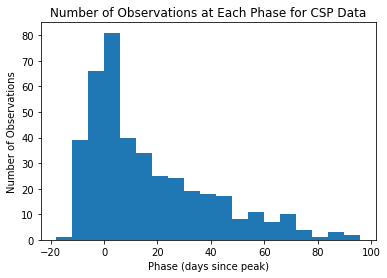

In [7]:
all_phases = phase_for_dr1(dr1)
bins = np.arange(-18,100,6)
plt.hist(x = all_phases, bins = bins)
plt.xlabel('Phase (days since peak)')
plt.ylabel('Number of Observations')
plt.title('Number of Observations at Each Phase for CSP Data')
plt.rcParams['figure.figsize'] = [10, 5]

In [8]:
#repeat w SDSS and make the same plot, stack the histogram, data tables are the same w same data names the same,
#some SDSS are not supernovae, either other objects or host galaxy
#column in SDSS. one is called type will either be Ia or II or gal etc, remove all rows where that's equal to gal
#in master table, there are classifications, called Classification lists for all dif objects, only want Type Ia
#step 1 get obj ids of type ia
master = sako12spec.load_table('master')
obj_id = master[master['Classification']=='Ia']['CID']
for obj in obj_id:
    data = sako18spec.get.data_for_id(obj)
    sn_data = data[data['type']!='Gal']
    break
#time of peak brightness is not in the same table, think its in table 'master' can do print.colnames to see column names

NameError: name 'sako12spec' is not defined

In [11]:
from sndata.sdss import Sako18Spec
sako18spec = Sako18Spec()
sako18spec.download_module_data()
table1 = sako18spec.load_table('master')
print(table1)
#print.col_names('master')

FileNotFoundError: [Errno 2] No such file or directory: '/opt/anaconda3/lib/python3.7/site-packages/sndata/sdss/Spectra_txt.zip'